In [3]:
import h5py
import glob
import numpy as np
import matplotlib.pyplot as plt

In [13]:
filenames = glob.glob('../results/*.h5')

In [21]:
def parse_filename(filename):
  filename_arr = filename.split('\\')[-1][:-3].split('_')
  global_round = int(filename_arr[3][2:])
  local_step = int(filename_arr[4][2:])
  batch_size = int(filename_arr[5][2:])
  learning_rate = float(filename_arr[6][2:])
  return filename_arr[0], filename_arr[1], filename_arr[2], global_round, local_step, batch_size, learning_rate

In [20]:
parse_filename(filenames[0])

['Cifar10', 'FedAvg', 'cnn', 'gr100', 'ls5', 'bs100', 'lr0.05']


In [38]:
result_arr = []
for filename in filenames:
	with h5py.File(filename, 'r') as f:
		dataset, _, model, global_round, local_step, batch_size, learning_rate = parse_filename(filename)
		loss = f['rs_train_loss'][:]
		acc = f['rs_test_acc'][:]
		result_arr.append([dataset, model, global_round, local_step, batch_size, learning_rate, loss, acc])

In [54]:
def plot_loss_acc(result_arr, dataset, model, local_step, learning_rate=0.05):
	fig, ax = plt.subplots(1, 2, figsize=(15, 5))
	fig.suptitle(f'{dataset} {model.upper()} Results')
	ax[0].set_title('Loss')
	ax[1].set_title('Accuracy')
	for result in result_arr:
		if result[0] != dataset or result[1] != model or result[3] != local_step or result[5] != learning_rate:
			continue
		ax[0].plot(result[6], label=f'Epoch: {result[2]:<3} Local Step: {result[3]:<2} Batch Size: {result[4]:<3}')
		ax[1].plot(result[7], label=f'Epoch: {result[2]:<3} Local Step: {result[3]:<2} Batch Size: {result[4]:<3}')
	ax[0].set_ylim(0, 1)
	ax[0].legend()
	ax[1].legend()
	plt.show()

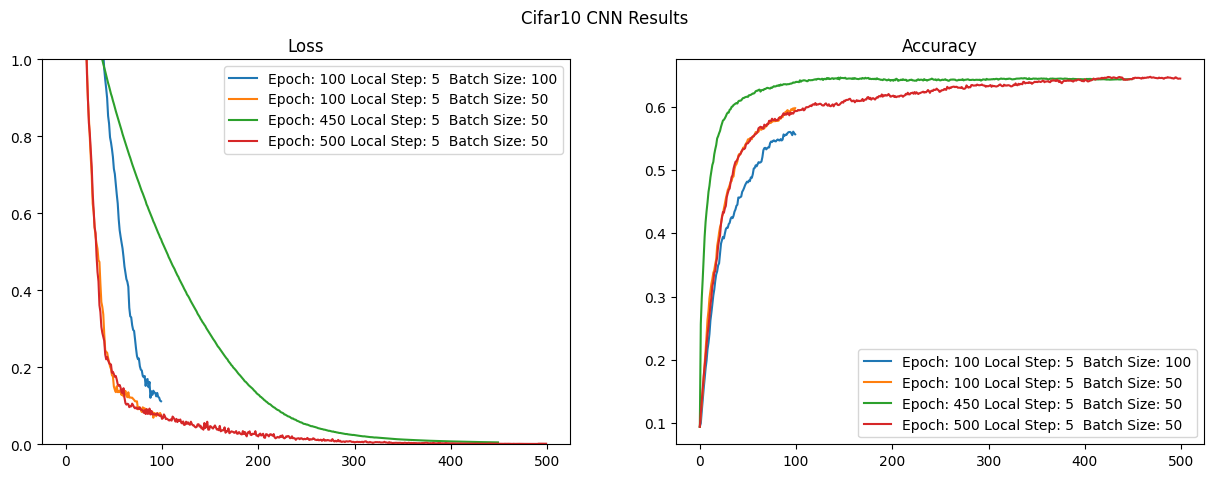

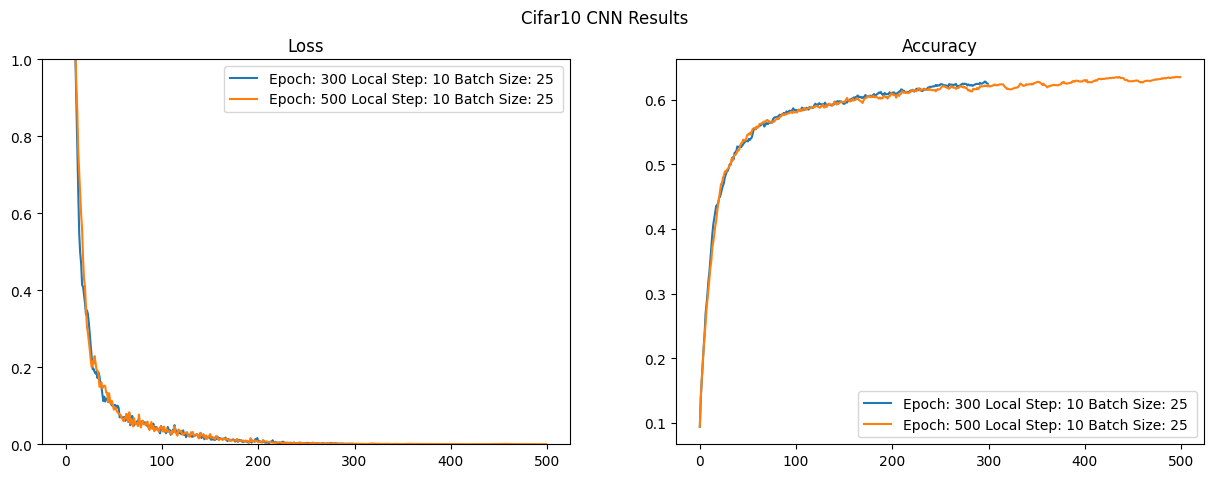

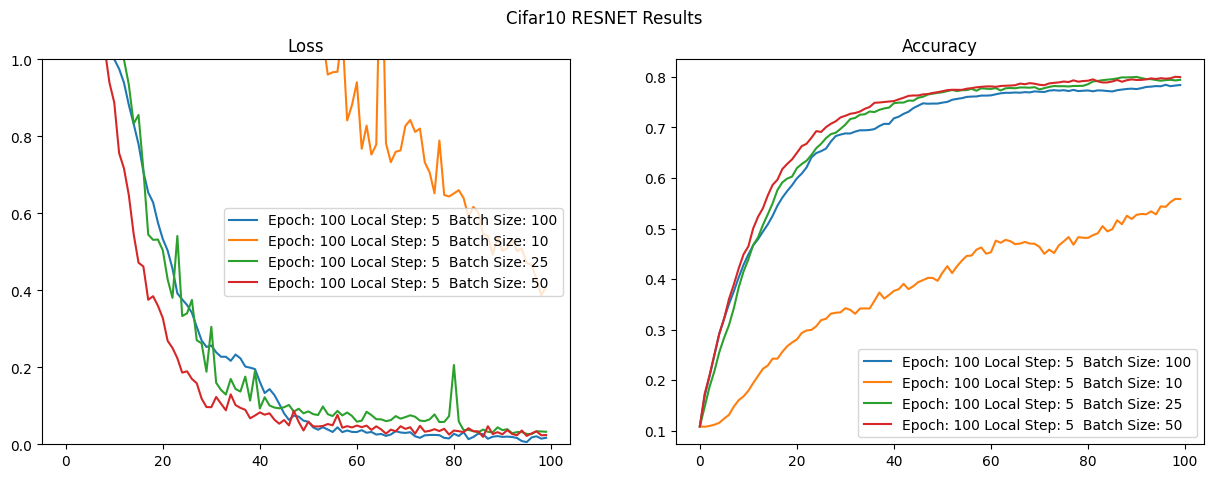

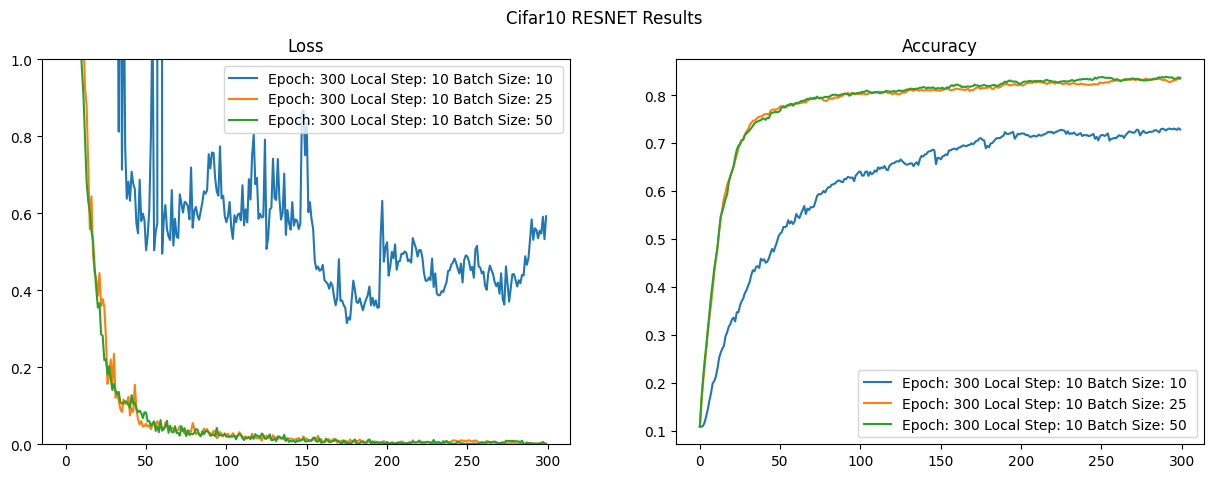

In [55]:
plot_loss_acc(result_arr, 'Cifar10', 'cnn', 5)
plot_loss_acc(result_arr, 'Cifar10', 'cnn', 10)
plot_loss_acc(result_arr, 'Cifar10', 'resnet', 5)
plot_loss_acc(result_arr, 'Cifar10', 'resnet', 10)